# Linear Regression
The Whopper has been Burger King’s signature sandwich since 1957. One Double Whopper with cheese provides 53 grams of protein! That's all the protein you need in a day. It also supplies 1020 calories and 65 grams of fat 😲😲😲. FYI - the Daily Value (based on a 2000-calorie diet) for fat is 65 grams. So after a Double Whopper you’ll want the rest of your calories that day to be fat-free. Of course, the Whopper isn’t the only item Burger King sells. How are fat and protein related on the entire BK menu? The scatterplot of the Fat (in grams) versus the Protein (in grams) for foods sold at Burger King shows a positive, moderately strong, linear relationship.
![Scatterplot of BK](https://raw.githubusercontent.com/SSpindt/AI/refs/heads/main/Semester%201/Problem%20Set%20Images/BKScatter.png)
If you want 25 grams of protein in your lunch, how much fat should you expect to consume at Burger King? The correlation between Fat and Protein is 0.83, a sign that the linear association seen in the scatterplot is fairly strong. But strength of the relationship is only part of the picture. The correlation says, “The linear association between these two variables is fairly strong,” but it doesn’t tell us what the line actually is.
Now we can say more; the equation will let us predict the fat content for any Burger King food, given its amount of protein. 

For the Burger King foods, we’d choose a linear model to describe the relationship between Protein and Fat.
Of course, no line can go through all the points, but a linear model can summarize the general pattern with only a couple of parameters. Like all models of the real world, the line will be wrong — wrong in the sense that it can’t match reality exactly. But it can help us understand how the variables are associated.
Not only can’t we draw a line through all the points, the best line might not even hit any of the points. Then how can it be the “best” line? We want to find the line that somehow comes closer to all the points than any other line. Some of the points will be above the line and some below. For example, the line might suggest that a BK Broiler chicken sandwich with 30 grams of protein should have 36 grams of fat when, in fact, it actually has only 25 grams of fat. The BK Broiler chicken residual would be `actual - predicted = 25 - 36 = -11 g of fat`. The negative residual tells us that the actual fat content of the BK Broiler chicken is about 11 grams less than the model predicts for a typical Burger King menu item with 30 grams of protein. Our challenge now is how to find the right line.

When we draw a line through a scatterplot, some residuals are positive and some negative. We can’t assess how well the line fits by adding up all the residuals—the positive and negative ones would just cancel each other out. We faced the same issue when we calculated a standard deviation to measure spread. And we deal with it the same way here: by squaring the residuals. Squaring makes them all positive. Now we can add them up. Squaring also emphasizes the large residuals. After all, points near the line are consistent with the model, but we’re more concerned about points far from the line. When we add all the squared residuals together, that sum indicates how well the line we drew fits the data — the smaller the sum, the better the fit. A different line will produce a different sum, maybe bigger, maybe smaller. The **line of best fit** is the line for which the sum of squared residuals is smallest! We call this line the **least squares line**. It can be described as `y = mx + b `or more generically as `y = b0 + b1x` (*b0 is the y intercept and b1 is the slope*).You can use the line of best fit to make predictions -- all you have to do is plug in your value for x and solve for y!

## <span style="color:blue">Your Turn</span>
Please solve the following problems using Python, Markdown, and this [data set about movies](https://drive.google.com/file/d/1QmsmZSTI9VOesBH4yL_8LHTxV63Gz2hv/view?usp=drive_link). 

## <span style="color:blue">Problem 1</span>
First, examine the relationship between `budget` and `critics score`. Then, answer these questions:
1. What kind of relationship is found between `budget` and `critics score`? How do you know?
2. Define a function that returns the equation of the line of best fit for `budget` and `critics score`. What is that equation? *You can only use standard Python and Pandas in your function. You cannot use Numpy or any other Python library.*
3. According to your line of best fit, what score would a movie receive if its budget was $10 million? How accurate is this prediction?

In [12]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import requests
df = pd.read_json('problem_set.json')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 4 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   critics score (percent)           1000 non-null   float64
 1   budget (millions)                 1000 non-null   float64
 2   length (minutes)                  1000 non-null   float64
 3   curse words used (rate per hour)  1000 non-null   float64
dtypes: float64(4)
memory usage: 31.4 KB


0.9697766428756551

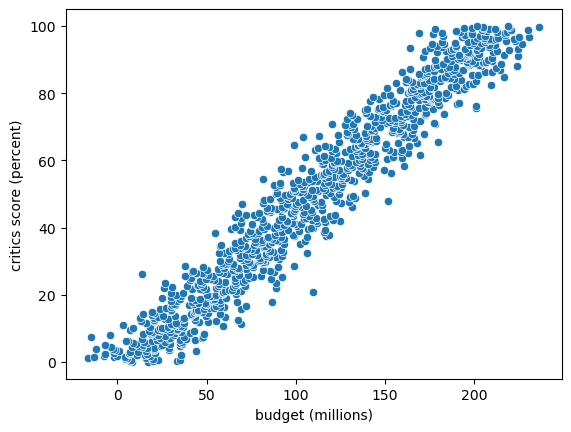

In [13]:
# Write the code you need for question 1 here.
sns.scatterplot(data= df, x="budget (millions)", y="critics score (percent)")
df['budget (millions)'].corr(df['critics score (percent)'])

***Answer question 1 here. Please use complete sentences and quantitative evidence in your answer.***
There is a very strong, positive, linear relationship between budget and critic score. This is supported by the fact that the coorelation coefficient is 0.97 which is positive and very close to 1.

0.46603264423232393 -1.3987314019556294


'y = 0.466033x + -1.398731'

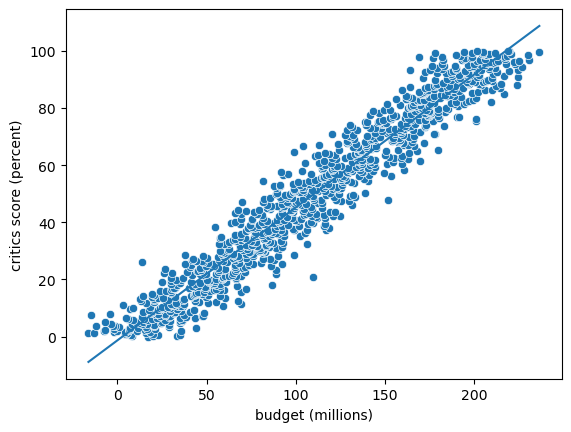

In [14]:
# Write the code you need for question 2 here.
def lsrl(expl, resp):
    m = df[expl].corr(df[resp]) * (df[resp].std() / df[expl].std())
    b = (df[resp].mean() - m * df[expl].mean())
    print(m , b)
    linearData = [df[expl].min(), m * df[expl].min() + b], [df[expl].max(), m * df[expl].max() + b]
    linearDf = pd.DataFrame(linearData, columns=['explanatory', 'response'])
    linearDf.head()
    sns.scatterplot(data= df, x= expl, y= resp)
    sns.lineplot(data = linearDf, x = 'explanatory', y = 'response')
    #return ("y =" + m + "x +" + b)
    return f"y = {m:f}x + {b:f}"
lsrl('budget (millions)', 'critics score (percent)')

***Answer question 2 here. Please use complete sentences and quantitative evidence in your answer.***
The equation for the line of best fit is 
#### y = 0.466033x - 1.398731

In [45]:
# Write the code you need for question 3 here.

print(0.466033 * 10 - 1.398731)

print(df[df['budget (millions)'] == 10]['critics score (percent)'])

close_movies = df[(df['budget (millions)'] >= 9.5) & (df['budget (millions)'] <= 10.5)]

print(close_movies['critics score (percent)'])

print(df.loc[52]['budget (millions)'])

3.2615990000000004
Series([], Name: critics score (percent), dtype: float64)
52    5.205205
Name: critics score (percent), dtype: float64
10.2565804058


***Answer question 3 here. Please use complete sentences and quantitative evidence in your answer.***
According to the line of best fit, a movie with a budget of 10 million would receive a critics score of 3.262. The movie with the budget closest to 10 million received a score of 5.205. This is a residual of 1.943. Since this residual is low it indicates high accuracy.

## <span style="color:blue">Problem 2</span>
Now, examine the relationship between `length` and `critics score`. Then, answer these questions:
1. What kind of relationship is found between `length` and `critics score`? How do you know?
2. If you haven't done so already, please generalize your Linear Regression function so that it works on all kinds of quantitative data. Once you are done generalizing your function, call it using `length` and `critics score` as arguments. What is the equation of the best fit line? *Reminder, you can only use standard Python and Pandas in your function. You cannot use Numpy or any other Python library.*
3. According to your line of best fit, what score would a movie receive if its length was 150 minutes? How accurate is this prediction?

-0.7649508928065849

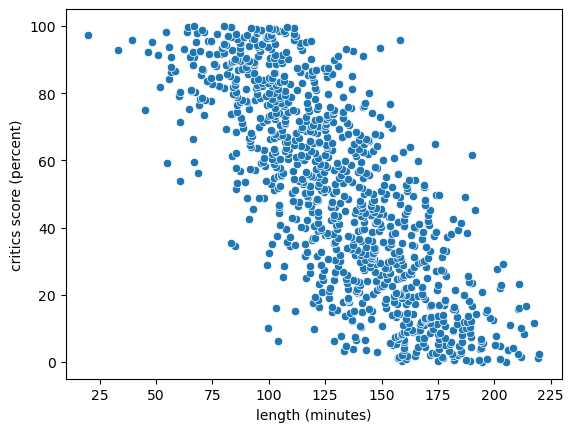

In [15]:
# Write the code you need for question 1 here.
sns.scatterplot(data= df, x="length (minutes)", y="critics score (percent)")
df['length (minutes)'].corr(df['critics score (percent)'])

***Answer question 1 here. Please use complete sentences and quantitative evidence in your answer.***
There is a strong, negative, linear coorellation between length and critic score.This is supported by the fact that the coorelation cooeficient is -0.765 which is negative and close to -1.  

-0.6341943700384373 132.67331245869116


'y = -0.634194x + 132.673312'

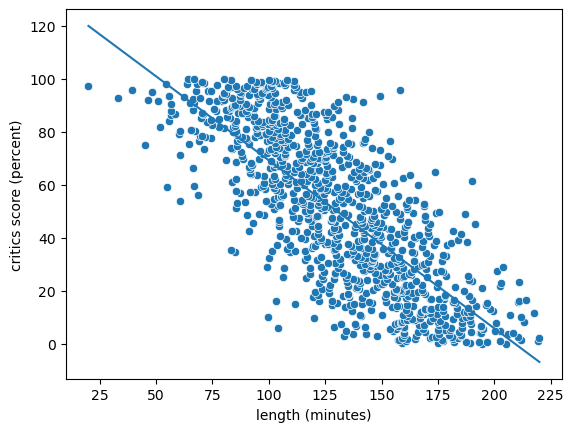

In [16]:
# Write the code you need for question 2 here. 
# If you generalized your function in Problem 1, 
# please just copy and paste your function definition and call below.
def lsrl(expl, resp):
    m = df[expl].corr(df[resp]) * (df[resp].std() / df[expl].std())
    b = (df[resp].mean() - m * df[expl].mean())
    print(m , b)
    linearData = [df[expl].min(), m * df[expl].min() + b], [df[expl].max(), m * df[expl].max() + b]
    linearDf = pd.DataFrame(linearData, columns=['explanatory', 'response'])
    linearDf.head()
    sns.scatterplot(data= df, x= expl, y= resp)
    sns.lineplot(data = linearDf, x = 'explanatory', y = 'response')
    #return ("y =" + m + "x +" + b)
    return f"y = {m:f}x + {b:f}"
lsrl('length (minutes)', 'critics score (percent)')

***Answer question 2 here. Please use complete sentences and quantitative evidence in your answer.*** The equation for the line of best fit is 
#### y = -0.634194x + 132.673312

In [29]:
# Write the code you need for question 3 here.

# Find predicted value
print(-0.634194 * 150 + 132.673312)

# Find critic score for movies with a length of 150 minutes
print(df[df['length (minutes)'] == 150]['critics score (percent)'])

# Filter for movies with lengths close to 150 minutes
close_movies = df[(df['length (minutes)'] >= 149.95) & (df['length (minutes)'] <= 150.05)]

# Print the critics' scores for these movies
print(close_movies['critics score (percent)'])

# finding which is closest to 150 minutes in length
print(df.loc[108]['length (minutes)'])
print(df.loc[227]['length (minutes)'])

37.544212
Series([], Name: critics score (percent), dtype: float64)
108    10.810811
227    22.722723
Name: critics score (percent), dtype: float64
150.0243176668
150.0308612062


***Answer question 3 here. Please use complete sentences and quantitative evidence in your answer.***
According to the line of best fit, a movie with a length of 150 minutes would receive a score of 37.544212 percent. This prediction was not very accurate. The movie with a length closest to 150 has a critic score of 10.810811 percent. The residual is -26.73 percent which is a lot.

## <span style="color:blue">Problem 3</span>
Finally, examine the relationship between `budget` and `curse words used`. Then, answer these questions:
1. What kind of relationship is found between `budget` and `curse words used`? How do you know?
2. Generalize your Linear Regression function even more. You should be able to call it and have it work on any quantitative data without changing anything about the function definition. Once you are done generalizing your function, call it using `budget` and `curse words used` as arguments. What is the equation of the best fit line? *Reminder, you can only use standard Python and Pandas in your function. You cannot use Numpy or any other Python library.*
3. According to your line of best fit, how many curse words would be used during a movie if it had a $5 million dollar budget? How accurate is this prediction?

0.035462236713153815

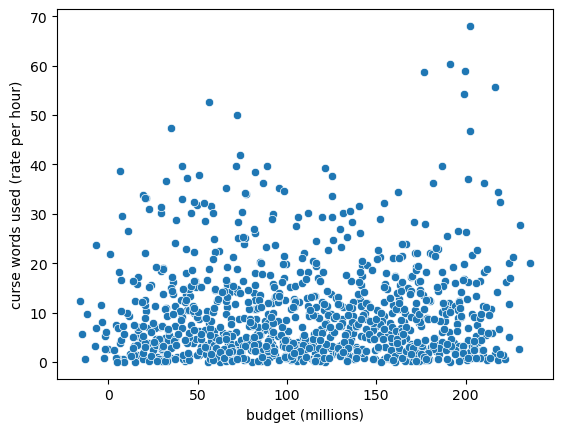

In [30]:
# Write the code you need for question 1 here.
sns.scatterplot(data= df, x="budget (millions)", y="curse words used (rate per hour)")
df['budget (millions)'].corr(df['curse words used (rate per hour)'])

***Answer question 1 here. Please use complete sentences and quantitative evidence in your answer.*** There is no relationship between budget and curse words used. This is supported by the fact that the coorelation coefficient is 0.035 which is very close to 0.

0.005780650959769845 9.240233598815546


'y = 0.005781x + 9.240234'

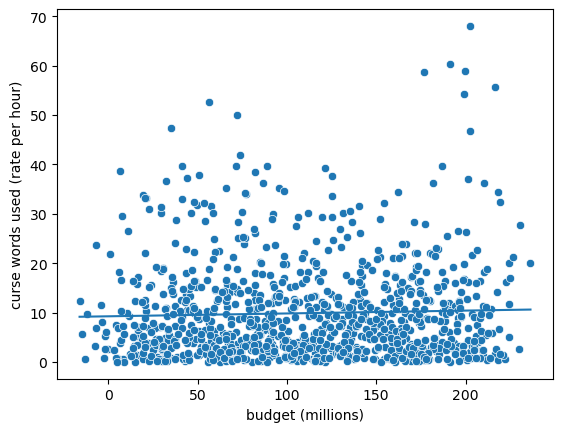

In [31]:
# Write the code you need for question 2 here.
# If you generalized your function in Problem 1 or Problem 2, 
# please just copy and paste your function definition and call below.
def lsrl(expl, resp):
    m = df[expl].corr(df[resp]) * (df[resp].std() / df[expl].std())
    b = (df[resp].mean() - m * df[expl].mean())
    print(m , b)
    linearData = [df[expl].min(), m * df[expl].min() + b], [df[expl].max(), m * df[expl].max() + b]
    linearDf = pd.DataFrame(linearData, columns=['explanatory', 'response'])
    linearDf.head()
    sns.scatterplot(data= df, x= expl, y= resp)
    sns.lineplot(data = linearDf, x = 'explanatory', y = 'response')
    #return ("y =" + m + "x +" + b)
    return f"y = {m:f}x + {b:f}"
lsrl('budget (millions)', 'curse words used (rate per hour)')

***Answer question 2 here. Please use complete sentences and quantitative evidence in your answer.*** The equation of the line of best fit is 
#### y = 0.005781x + 9.240234

In [36]:
# Write the code you need for question 3 here.
print(0.005781 * 5 + 9.240234)

print(df[df['budget (millions)'] == 150]['curse words used (rate per hour)'])

close_budget = df[(df['budget (millions)'] >= 4.9) & (df['budget (millions)'] <= 5.1)]

print(close_budget['curse words used (rate per hour)'])

print(df.loc[10]['budget (millions)'])


9.269139
Series([], Name: curse words used (rate per hour), dtype: float64)
10    0.799766
Name: curse words used (rate per hour), dtype: float64
5.0507366098


***Answer question 3 here. Please use complete sentences and quantitative evidence in your answer.*** According to my line of best fit, 9.269139 curse words would be used per hour if a movie had a 5 million dollar budget. The movie with a budget closest to $5 million has 0.799766 curse words per hour. This is a residual of -8.469373. This indicates that the prediction is not very accurate.

## <span style="color:blue">Problem 4</span>
Compare Linear Regression algorithms with someone from a different table. Then, answer these questions:
1. How are your algorithms similar? Different?
2. Whose algorithm was more accurate for problem 1? Problem 2? Problem 3?
3. Why do you think that algorithm was more accurate for one or all of these problems?

***Answer question 1 here. Please use complete sentences and quantitative evidence in your answer.***
I compared my algorithm with Logan's algorithm. Our algorithms were very different. Logan used a guess and check algorithm. The algorithm I used calcualted the slope and y-intercept this way: slope = correlation coefficent * (standard deviation of y / standard deviation of x) , intercept = (mean of y - slope * mean of x)

***Answer question 2 here. Please use complete sentences and quantitative evidence in your answer.*** 
My prediction was more accurate for problem 1. We predicted the same for problem 2. We predicted the same for problem 3.

***Answer question 3 here. Please use complete sentences and quantitative evidence in your answer.*** The accuracy was pretty much the same for both 